# Advance Regression Assignment

### Problem Statement 
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

## Expected output 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

In [1]:
# importing all the important libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics


# importing warning package to ignore the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#reading the collected data 

collected_data = pd.read_csv(r"C:\Users\MANDAR\Downloads\upgrade\Advance_Regression_model_assigment\train.csv")

In [3]:
# Check the data

collected_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check the present all columns

collected_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# Check the dimensions
collected_data.shape

(1460, 81)

In [6]:
# Check the data details

collected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# checking unique values for every column in data

collected_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

# Performing EDA and data cleaning

#### Checking important columns EDA as seen in data

In [8]:
#All numeric (float and int) variables in the dataset

data_numeric = collected_data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
# Dropping ID Column

data_numeric = data_numeric.drop(['Id'], axis=1)
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Text(0.5, 1.0, 'Basement Condition')

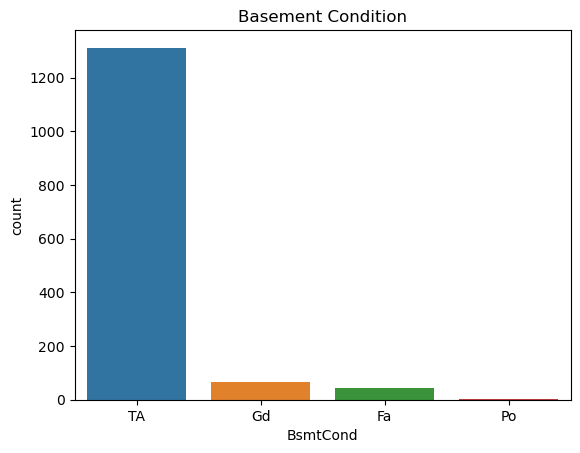

In [10]:
## Checking Basement counts
sns.countplot(x='BsmtCond', data= collected_data)
plt.title('Basement Condition')

Text(0.5, 1.0, 'Overall Condition')

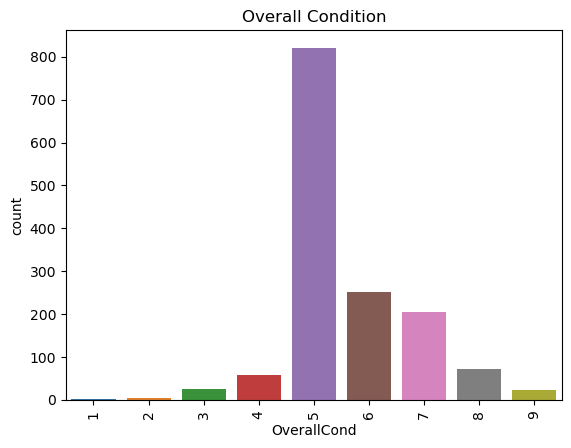

In [11]:
sns.countplot(x='OverallCond', data= collected_data).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

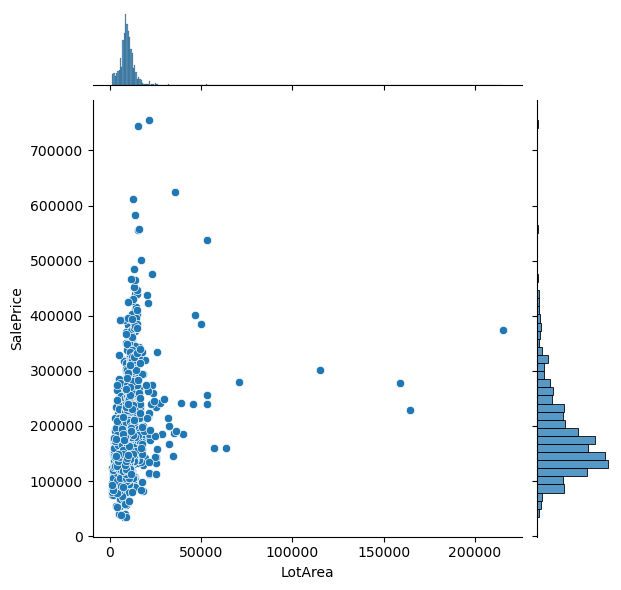

In [12]:
# LotArea vs SalePrice

sns.jointplot(x = collected_data['LotArea'], y = collected_data['SalePrice'])
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

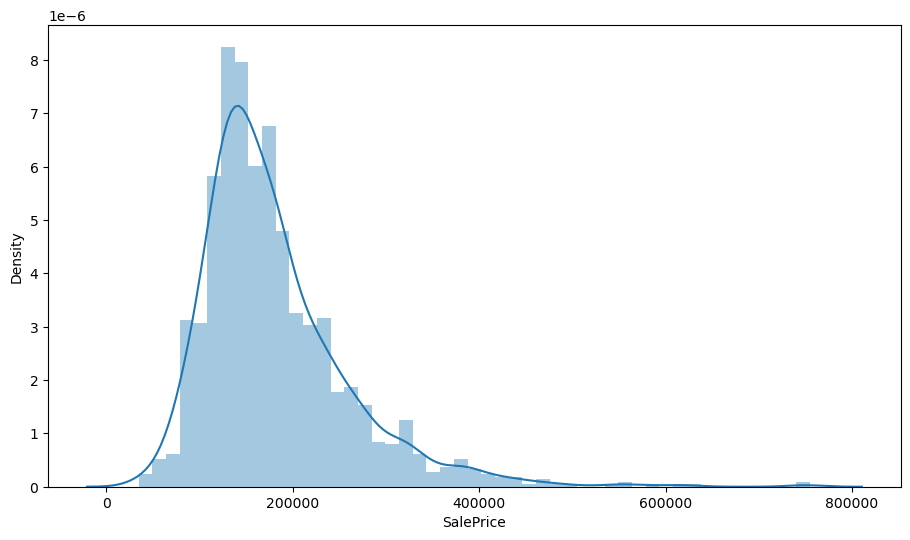

In [13]:
plt.figure(figsize=(11,6))
sns.distplot(collected_data['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

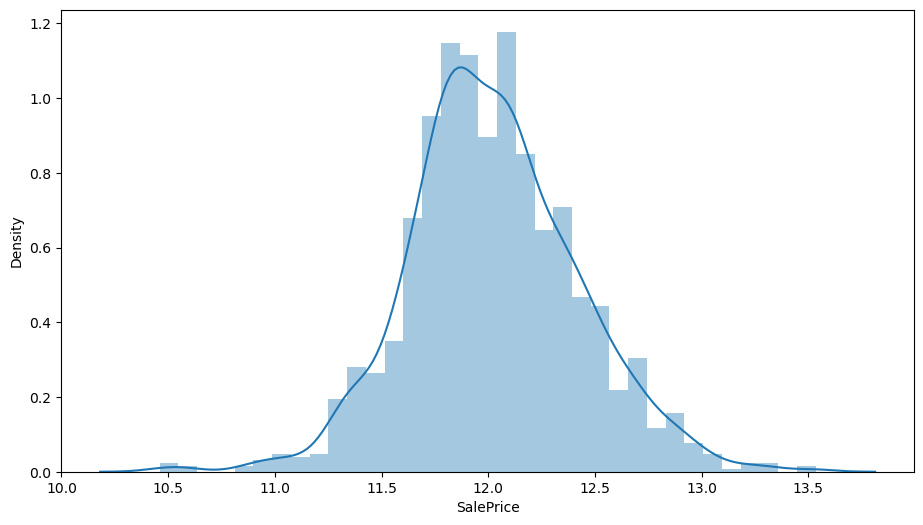

In [14]:
plt.figure(figsize=(11,6))
sns.distplot(np.log(collected_data["SalePrice"]))

In [15]:
# correlation matrix
cor = data_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


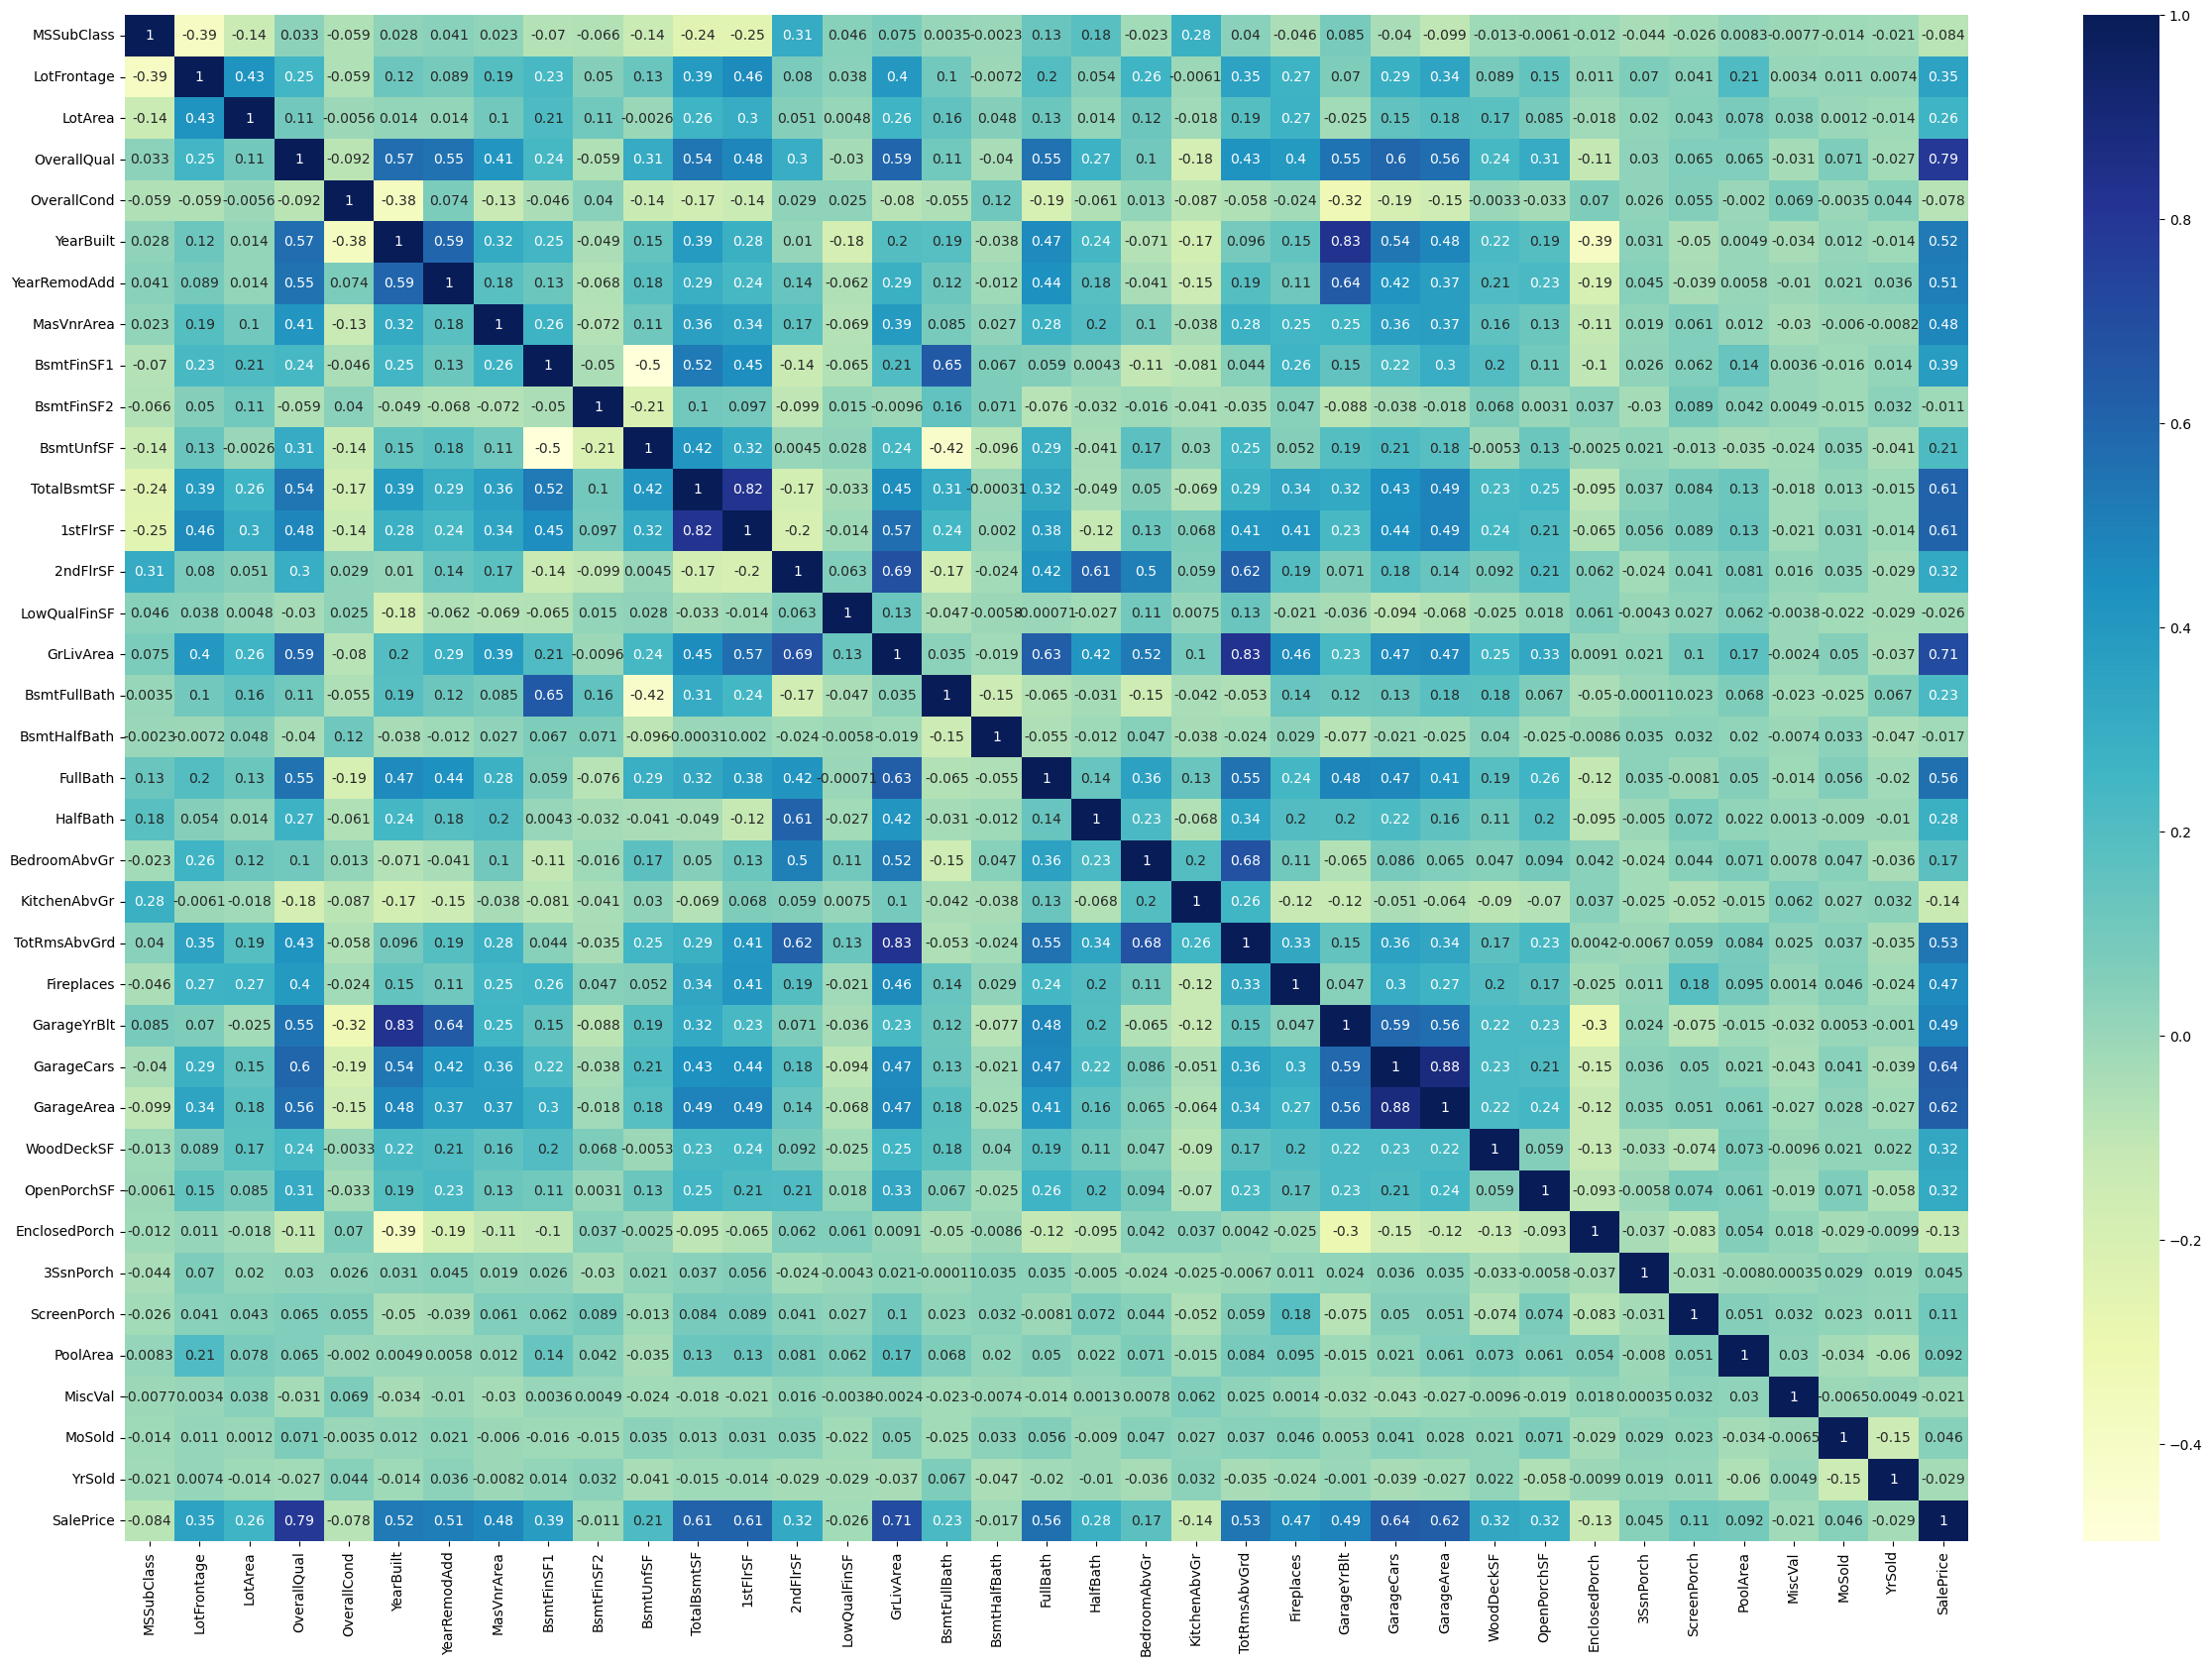

In [16]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

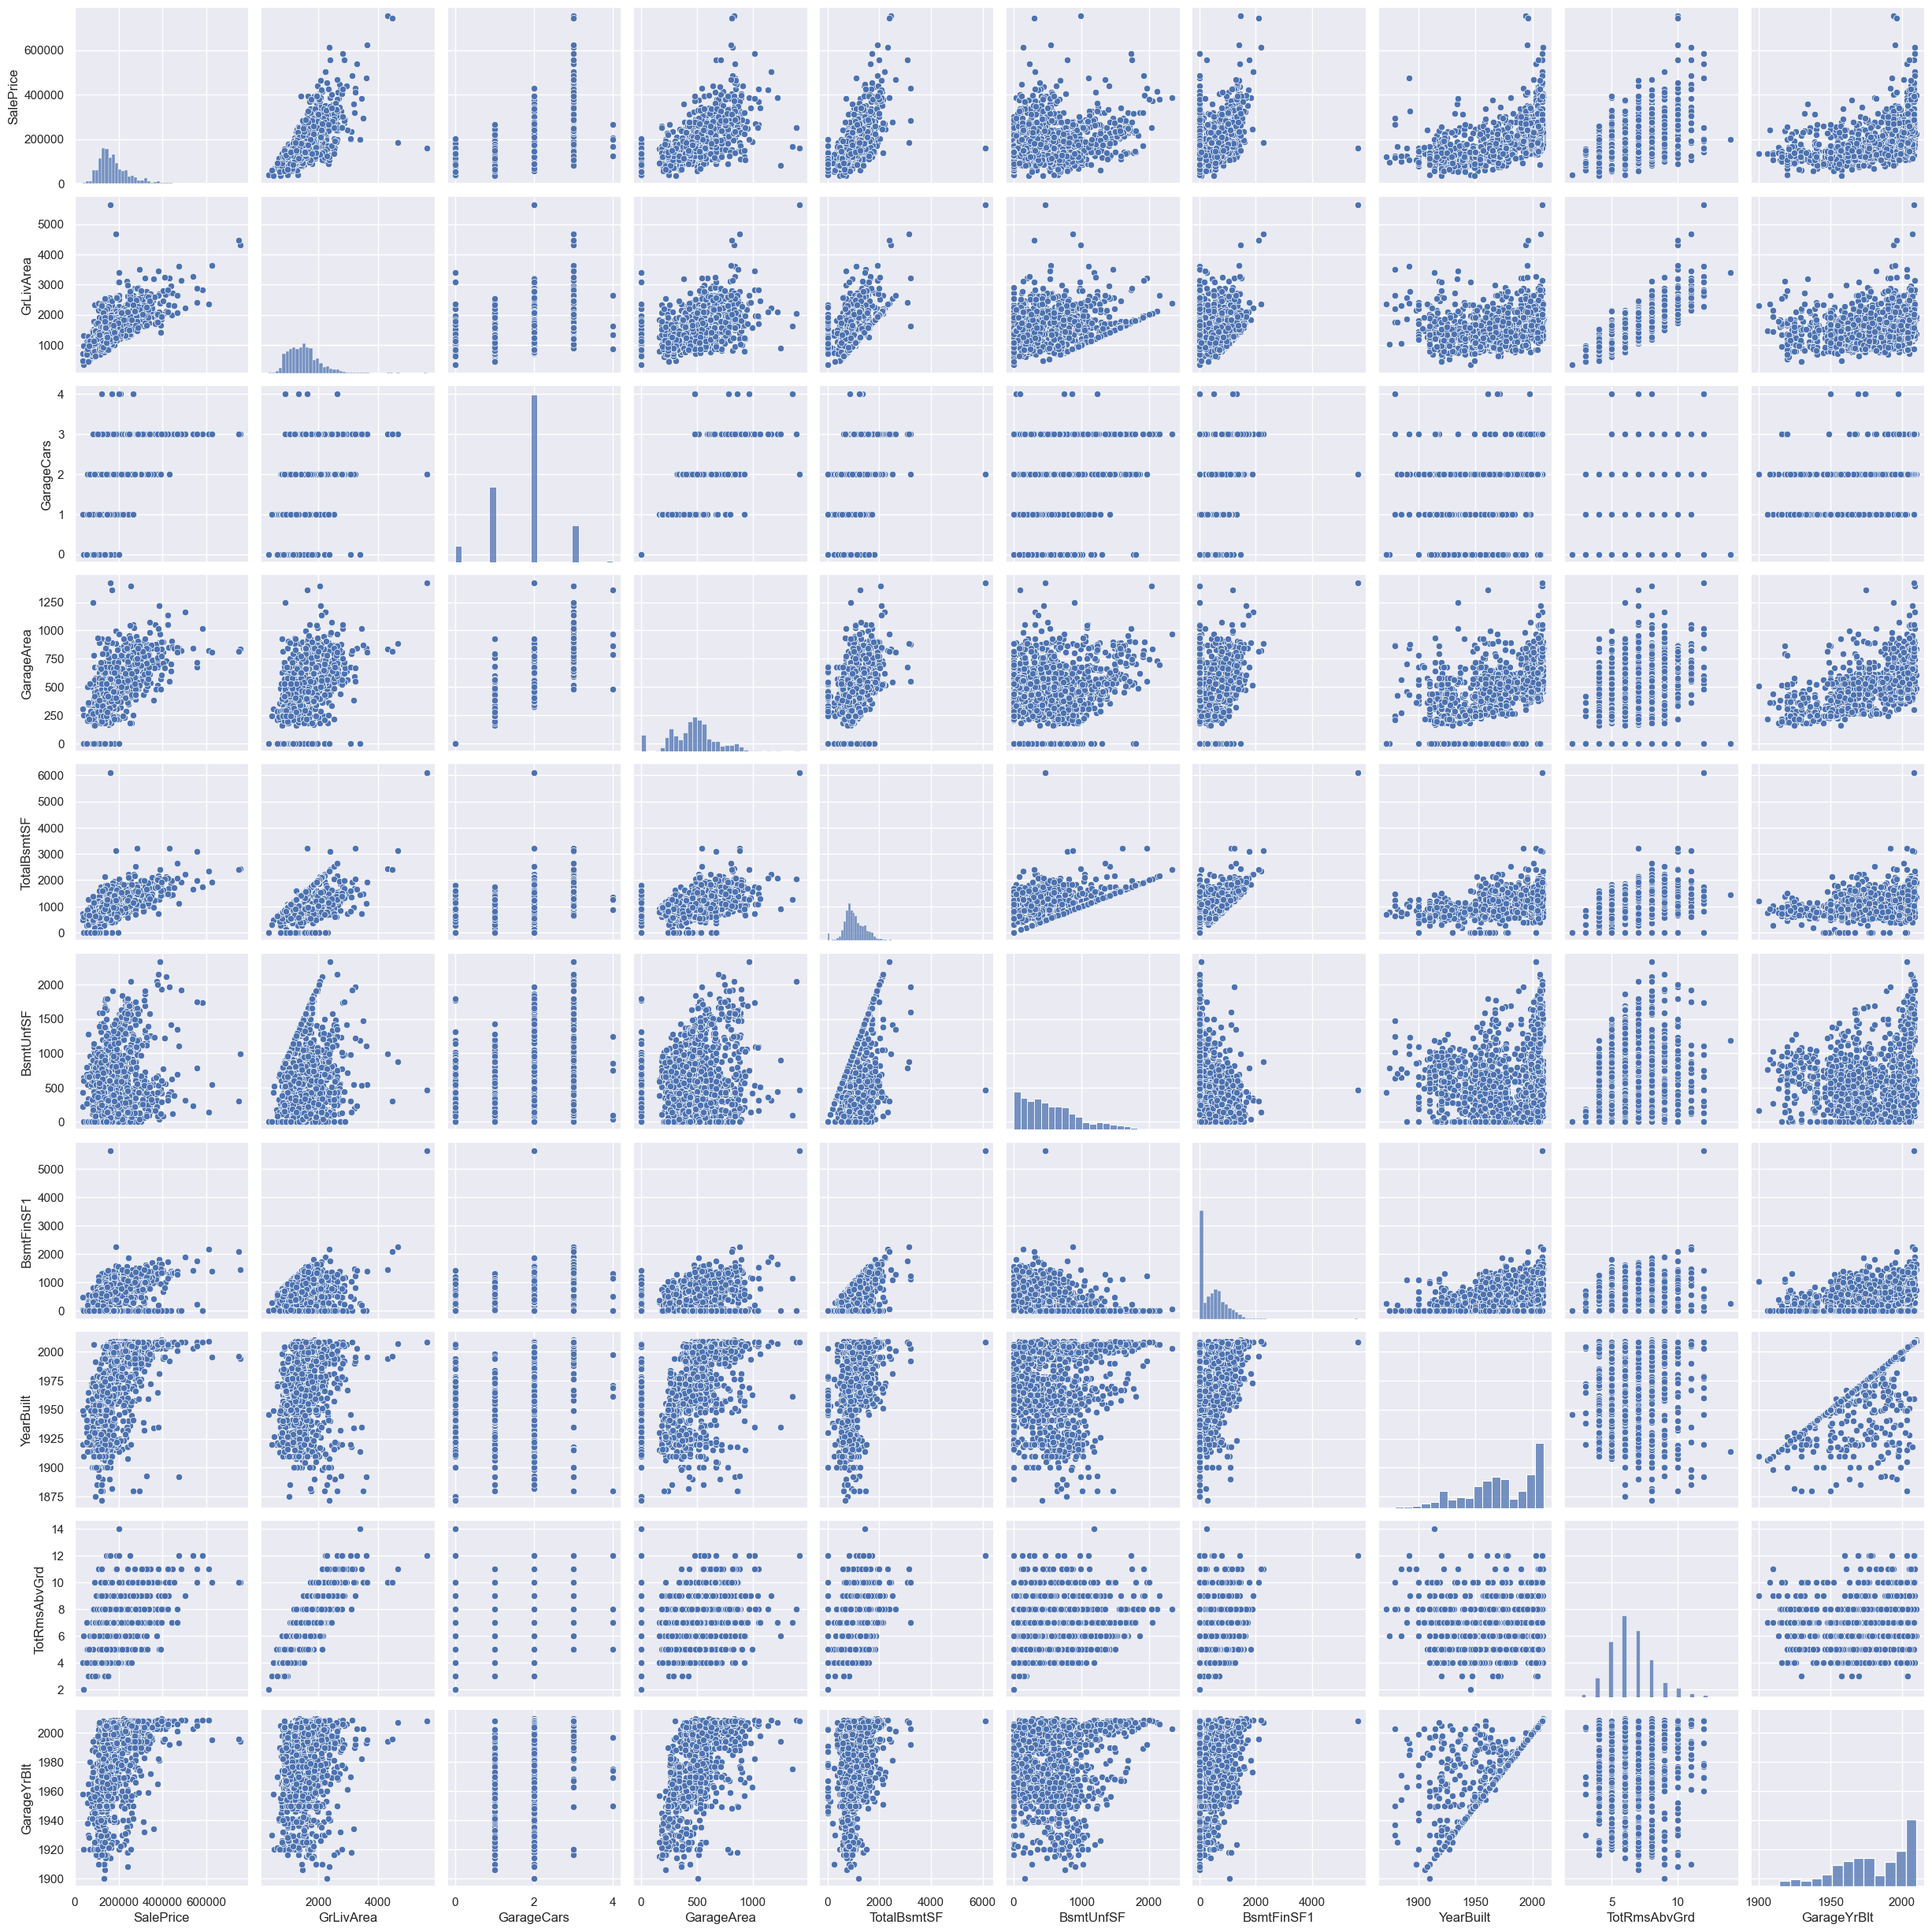

In [17]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','BsmtUnfSF', 'BsmtFinSF1', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(collected_data[cols], size = 2.5)
plt.show()

In [18]:
collected_data = collected_data.drop(['GarageCars', 'BsmtUnfSF' , 'TotRmsAbvGrd', 'GarageYrBlt' ], axis = 1)

collected_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
collected_data = collected_data.drop(['MoSold' ,'YrSold', 'YearBuilt', 'YearRemodAdd'], axis = 1)

collected_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,250000


In [20]:
collected_data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [21]:
collected_data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [22]:
# We can also drop columns that show very low variance and thus not required for predictions
collected_data = collected_data.drop(['Street', 'Utilities'], axis = 1)


In [23]:
## Checking the percentage of Null values

df_missing=pd.DataFrame((round(100*(collected_data.isnull().sum()/len(collected_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageType,5.55
GarageQual,5.55
GarageCond,5.55
GarageFinish,5.55


In [24]:
#Removing the columns where null values are present 

collected_data = collected_data.drop(['PoolQC' , 'MiscFeature' , 'Alley' ,'Fence', 'FireplaceQu' , 
                                       'LotFrontage' , 'GarageType' ,'GarageType' ,'GarageQual' , 'GarageCond',  'GarageFinish',
                                      'BsmtFinType2', 'BsmtExposure', 'BsmtQual' , 'BsmtFinType1' , 'BsmtCond' ,
                                      'MasVnrType' , 'MasVnrArea' ,'Electrical' ], axis = 1)


In [25]:
#Remove Id  column 

collected_data = collected_data.drop(['Id'], axis = 1)

### Creating Dummy columns to convert categorical into numerical

In [26]:
cat_values = collected_data.select_dtypes(include=['object'])
cat_values.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [27]:
# convert into dummies
data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [28]:
# Droping the original categorical column
collected_data = collected_data.drop(list(cat_values.columns), axis=1)

In [29]:
# Adding the dummy categorical column to original dataset
collected_data = pd.concat([collected_data,data_dummies], axis=1)

In [30]:
collected_data.shape

(1460, 180)

# Train Test Split

In [31]:
# Splitting the data into train and test

df_train,df_test = train_test_split(collected_data, train_size=0.7,test_size = 0.3, random_state=100)


In [32]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [33]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [34]:
##   Scaling the data
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])


# Model Building

In [35]:
## Building a Regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [36]:
from sklearn.metrics import r2_score, mean_squared_error 

In [37]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9101010263785325
-7.409823618642232e+22
14.428087856923376
5.340153998485666e+24
0.014131329928426422
1.2192132416633943e+22


In [38]:
# Print the coefficients and intercept
print(reg.intercept_)
print(reg.coef_)

7.949419007185872
[-2.61031790e-02  1.76518352e-02  4.96943306e-02  2.80010323e-02
  4.82325143e-02  3.30210968e-03  5.35486408e-02 -3.02315446e+12
 -3.30640332e+12 -3.66172555e+11  4.04104118e+12  1.33056641e-02
  5.73730469e-03  1.61132812e-02  1.59912109e-02  5.61523438e-03
 -1.95922852e-02 -7.32421875e-04  3.33404541e-02  1.82495117e-02
  1.12915039e-02  2.19726562e-03  3.05175781e-03  9.67407227e-03
  5.37109375e-03  6.46972656e-03  2.82165527e-01  4.16152954e-01
  4.02343750e-01  3.76708984e-01  1.36718750e-02  9.70611572e-02
  5.85937500e-03  9.12475586e-03 -6.05468750e-02 -2.86865234e-03
  2.29873657e-02 -1.05712891e-01  1.18465424e-02 -2.12097168e-02
  1.95617676e-02 -1.74554825e-01 -8.11500549e-02 -1.73809052e-01
 -1.04431152e-01 -2.24609375e-02 -9.57031250e-02  1.34796143e-01
 -1.45561218e-01 -8.90197754e-02 -1.95617676e-01 -2.88249969e-01
 -1.38763428e-01 -9.94873047e-02 -1.26388550e-01 -6.81762695e-02
 -1.00669861e-01 -1.91459656e-02 -1.14044189e-01 -1.57623291e-01
 -3.219

In [39]:
# predict
y_train_pred = reg.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9101010263785325

# Redge Regression

In [40]:
# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [41]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.01}
-0.09109617842393618


In [42]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005387,2.324050e-03,0.002191,4.006743e-04,0.0001,{'alpha': 0.0001},-0.087585,-0.097950,-0.095010,-0.095739,...,-0.091442,0.006309,3,-0.061727,-0.062092,-0.062774,-0.064169,-0.062890,-0.062730,0.000838
1,0.003989,6.307512e-04,0.002194,3.985170e-04,0.001,{'alpha': 0.001},-0.087630,-0.097941,-0.095105,-0.095456,...,-0.091379,0.006329,2,-0.061751,-0.062095,-0.062782,-0.064208,-0.062924,-0.062752,0.000847
2,0.003990,4.422006e-07,0.001396,4.887335e-04,0.01,{'alpha': 0.01},-0.088088,-0.097868,-0.095946,-0.093262,...,-0.091096,0.006314,1,-0.062272,-0.062127,-0.063154,-0.064692,-0.063441,-0.063137,0.000925
3,0.004622,8.175273e-04,0.002558,8.257743e-04,0.05,{'alpha': 0.05},-0.090190,-0.097722,-0.099362,-0.089207,...,-0.091877,0.006012,4,-0.065037,-0.062341,-0.065620,-0.067339,-0.066579,-0.065383,0.001714
4,0.003989,3.234067e-07,0.002194,3.989935e-04,0.1,{'alpha': 0.1},-0.091851,-0.097678,-0.101584,-0.087529,...,-0.092891,0.005973,5,-0.067428,-0.062685,-0.067376,-0.069755,-0.069023,-0.067253,0.002462
5,0.004091,4.858028e-04,0.001795,3.990176e-04,0.2,{'alpha': 0.2},-0.093629,-0.097659,-0.103451,-0.086286,...,-0.093914,0.006198,14,-0.069908,-0.063298,-0.069087,-0.072489,-0.071597,-0.069276,0.003221
6,0.004189,3.997330e-04,0.001994,6.311283e-04,0.3,{'alpha': 0.3},-0.094285,-0.097715,-0.104053,-0.085848,...,-0.094308,0.006324,17,-0.071331,-0.063812,-0.069993,-0.074046,-0.072983,-0.070433,0.003589
7,0.003898,1.992187e-04,0.001994,5.761645e-07,0.4,{'alpha': 0.4},-0.094607,-0.097794,-0.104273,-0.085677,...,-0.094493,0.006379,19,-0.072282,-0.064286,-0.070584,-0.075093,-0.073926,-0.071234,0.003793
8,0.004581,7.951442e-04,0.002195,4.004245e-04,0.5,{'alpha': 0.5},-0.094832,-0.097879,-0.104274,-0.085528,...,-0.094562,0.006406,21,-0.073037,-0.064716,-0.071010,-0.075860,-0.074640,-0.071853,0.003921
9,0.003789,3.987314e-04,0.002194,3.992137e-04,0.6,{'alpha': 0.6},-0.095007,-0.097986,-0.104171,-0.085558,...,-0.094609,0.006376,23,-0.073652,-0.065137,-0.071361,-0.076450,-0.075205,-0.072361,0.003991


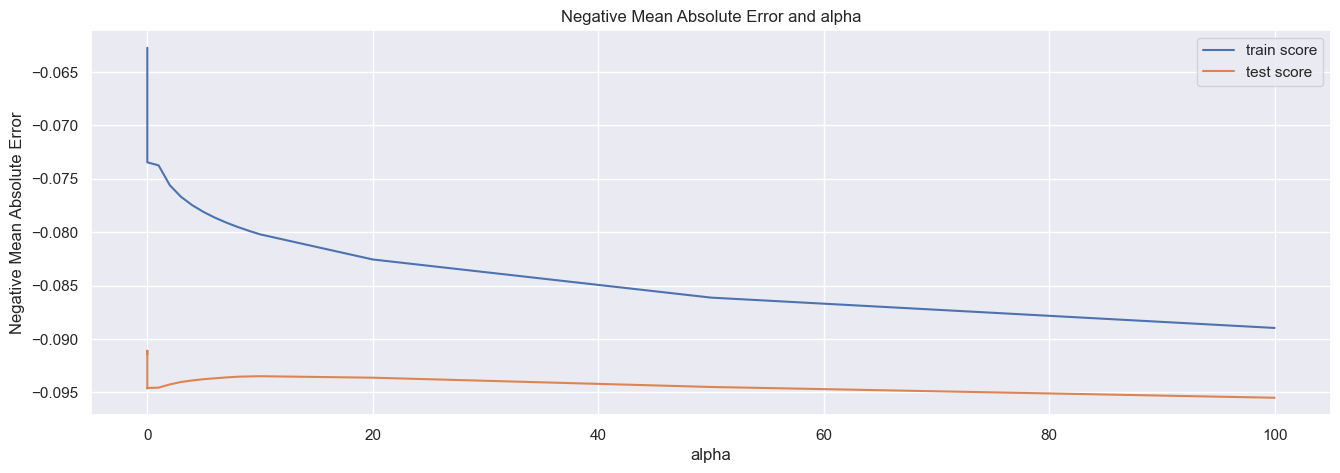

In [43]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [44]:
#final ridge model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01843273,  0.01104395,  0.10100137,  0.03830525,  0.01141501,
        0.00337811,  0.0093014 ,  0.04360992,  0.03490742,  0.00083145,
        0.06126193,  0.03832548,  0.00782139,  0.032479  ,  0.0215339 ,
        0.01386275, -0.0144228 ,  0.02131581,  0.03628244,  0.01664503,
       -0.00393417,  0.00330421,  0.00782498,  0.01114305, -0.02033539,
        0.0002584 ,  0.044238  ,  0.04505754,  0.06612041,  0.0193048 ,
        0.02757961, -0.05522165, -0.00411873,  0.04491296,  0.05600124,
        0.04816608,  0.04161492, -0.01987553, -0.00967167, -0.0049214 ,
        0.03021756, -0.00726837,  0.00037661, -0.03226271, -0.00474993,
        0.06640168, -0.01327659,  0.08296099, -0.09343362, -0.00913759,
       -0.08685011, -0.05318685, -0.0161573 , -0.02381055, -0.00675957,
       -0.00620099,  0.05154351,  0.09124796, -0.05183169, -0.01721262,
       -0.0283279 , -0.00393284,  0.07352332,  0.04623913,  0.01362652,
        0.04005795, -0.01072994,  0.06308673,  0.02064309, -0.02

In [45]:
#lets predict the R-squared value 
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9071744578633054


In [46]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8857996792703247


In [47]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

0.018790534080396906

# Lasso Regression

In [48]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [50]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.08978076319926315


In [51]:
#final lasso model
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [52]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9390637490969694


In [53]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.881741700406757


In [54]:
mean_squared_error(y_test, y_test_pred)

0.01945823439547652

In [55]:
lasso.coef_

array([-1.52321011e-02,  1.17701875e-02,  8.35978438e-02,  3.72480572e-02,
        2.41374081e-02,  3.09134039e-03,  2.25597189e-02,  8.28167489e-02,
        7.45648845e-02,  3.34094577e-03,  3.04298732e-02,  2.74289365e-02,
        4.45129257e-03,  2.42907287e-02,  1.50423276e-02,  4.59944558e-03,
       -1.77824870e-02,  1.48390693e-02,  3.40352078e-02,  1.30854814e-02,
        4.17214658e-03,  2.68530064e-03,  6.28129250e-03,  8.26286669e-03,
       -9.99599558e-03,  1.28978315e-04,  2.86161656e-01,  3.20729337e-01,
        3.13275157e-01,  2.84269824e-01,  1.61619904e-02, -4.60914840e-02,
       -1.97268666e-03,  3.90126896e-02,  5.88971227e-02,  3.94491859e-02,
        4.17741915e-02, -2.10365694e-02, -0.00000000e+00, -2.74777653e-03,
        2.31527031e-02, -1.10332735e-02,  0.00000000e+00, -7.61263796e-02,
       -1.31753771e-02,  8.72846232e-02,  0.00000000e+00,  1.01954765e-01,
       -8.58771255e-02,  1.10466725e-02, -8.28017254e-02, -1.74064436e-01,
       -1.91559017e-02, -

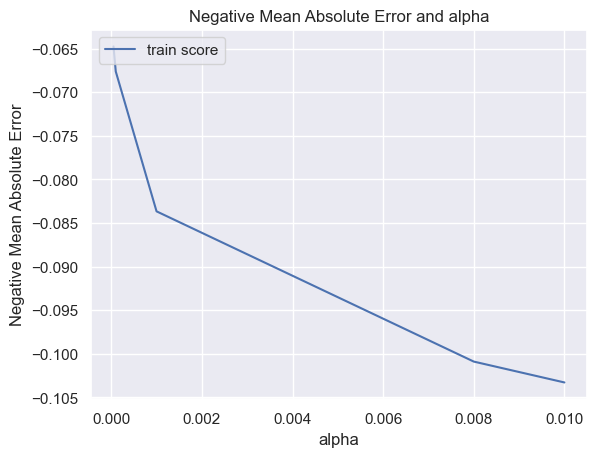

In [56]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [57]:
model_cv.best_params_

{'alpha': 0.01}

In [62]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9482881025618799
0.8740056861543284


In [63]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [64]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,8.818808
99,RoofMatl_Membran,2.663056
104,RoofMatl_WdShngl,2.496229
101,RoofMatl_Roll,2.476102
102,RoofMatl_Tar&Grv,2.431893
100,RoofMatl_Metal,2.423092
98,RoofMatl_CompShg,2.418053
103,RoofMatl_WdShake,2.285674
28,MSZoning_RH,0.428268
29,MSZoning_RL,0.418372


In [65]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8943786904527763
0.8775977519841182



#### Best alpha value for Lasso : 0.001
#### Best alpha value for Ridge :  0.01